<a href="https://colab.research.google.com/github/FGalvao77/others-knowledge-in-python-for-data-science/blob/main/Dicas_de_otimiza%C3%A7%C3%A3o_para_visualiza%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visualização de dados**

`Vamos conhecer uma técnica para simplificar nossas visualizações.`

Para isso, vamos usar a técnica conhecida como **ECDF (Emperical Cumulative Distribution Frequency**.
 - onde organiza os dados crescentemente no eixo X. E no eixo Y, lemos os números de observações e criamos o exato números de pontos equidistantes entre 0 e 1 (ex. se temos 10 pontos de dados, Y varia a cada 0.1, formando 10 valores entre 0 e 1).

 Na prática, isso vai virar um gráfico que te informa rapidamente aporecentagem de dados que está abaixo de um ponto específico.

**Vamos para a prática!**



In [61]:
# importando as bibliotecas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# criando a função
def ecdf(dados):
  n = len(dados)

  # sort x ascending
  x = np.sort(dados)

  # pontos de dados uniformemente espaçados entre 0 e 1 com o mesmo comprimento de dados
  y = np.arange(1, n + 1) / n
  return x, y


In [62]:
# instanciando a base de dados
df_tips = sns.load_dataset('tips')

In [63]:
# informações gerais
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [64]:
# aplicando a função
x, y = ecdf(df_tips.tip)

In [65]:
df_tips.tip

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

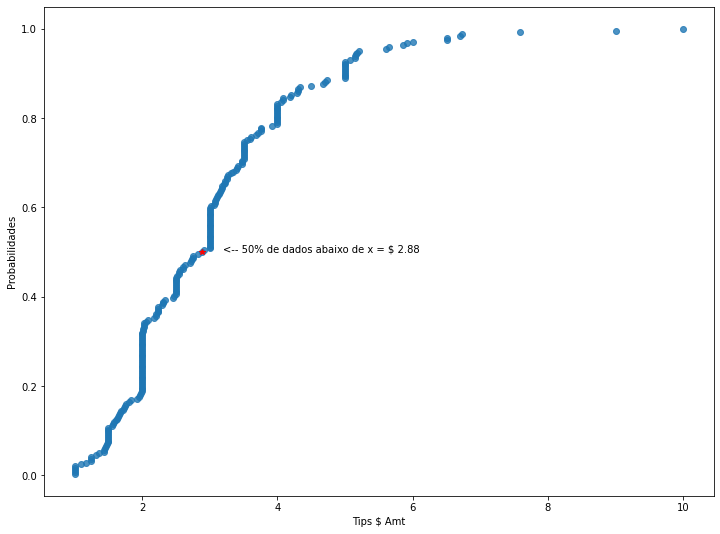

In [66]:
# plotando o gráfico
plt.figure(figsize=(12,9))
plt.plot(x, y, marker = 'o', linestyle = 'none', alpha = 0.8)
plt.plot(2.88, 0.5, marker = '*', color = 'red')
plt.xlabel('Tips $ Amt')
plt.ylabel('Probabilidades')
plt.annotate('<-- 50% de dados abaixo de x = $ 2.88',
             xy = (3.2, 0.5))
plt.show();

**Vamos para outro dataset**
 - repositório: https://github.com/mwaskom/seaborn-data

In [104]:
# instanciando a base de dados
df_mpg = sns.load_dataset('mpg')

In [105]:
# informações gerais
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [106]:
# aplicando a função
x, y = ecdf(df_mpg.mpg)

In [107]:
x.mean()

23.514572864321607

In [108]:
y.mean()

0.5012562814070352

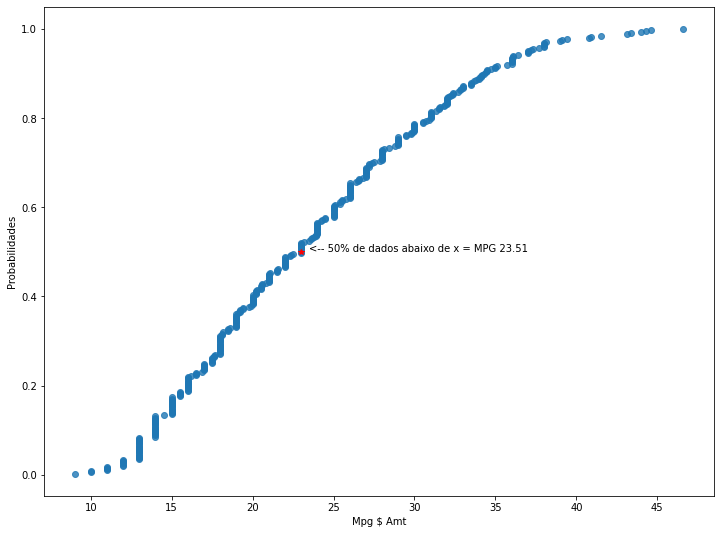

In [109]:
# plotando o gráfico
plt.figure(figsize=(12,9))
plt.plot(x, y, marker = 'o', linestyle = 'none', alpha = 0.8)
plt.plot(23.0, 0.5, marker = '*', color = 'red')
plt.xlabel('Mpg $ Amt')
plt.ylabel('Probabilidades')
plt.annotate('<-- 50% de dados abaixo de x = MPG 23.51',
             xy = (23.5, 0.5))
plt.show();

**Vamos para mais aplicação da técnica**

In [76]:
# instanciando a base de dados
df_diamonds = sns.load_dataset('diamonds')

In [77]:
# informações gerais
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [78]:
# aplicando a função
x, y = ecdf(df_diamonds.price)

In [80]:
x.mean()

3932.799721913237

In [81]:
y.mean()

0.5000092695587691

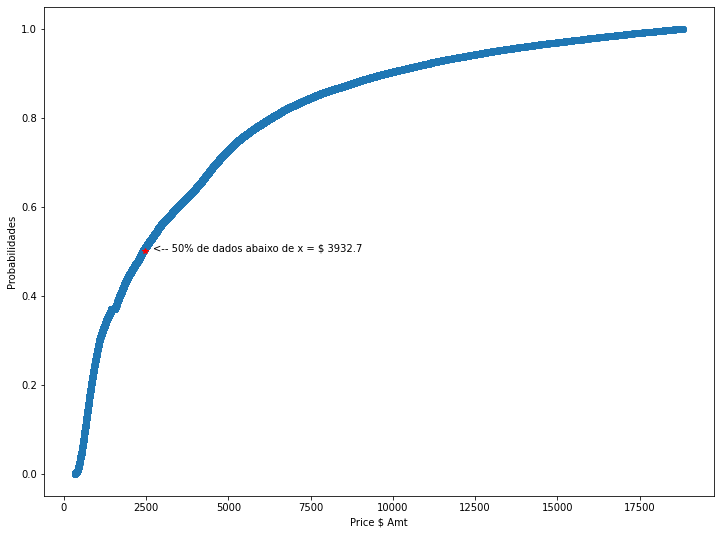

In [103]:
# plotando o gráfico
plt.figure(figsize=(12,9))
plt.plot(x, y, marker = 'o', linestyle = 'none', alpha = 0.8)
plt.plot(2480, 0.5, marker = '*', color = 'red')
plt.xlabel('Price $ Amt')
plt.ylabel('Probabilidades')
plt.annotate('<-- 50% de dados abaixo de x = $ 3932.7',
             xy = (2725, 0.5))
plt.show();

Fica aqui um link para conhecer suas aplicações. 
 - **Obs:** a utilização da técnica está na linguagem R.
  - https://data.library.virginia.edu/understanding-empirical-cumulative-distribution-functions/